1. 导入所需的库和数据
首先，导入所需的Python库，如pandas、numpy、matplotlib和sklearn，并加载数据集。你可以使用pandas库中的read_csv函数来读取CSV文件中的数据。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns


# 读取数据

In [2]:
data = pd.read_csv('Cancer_Data.csv')

2. 数据预处理
在构建模型之前，通常需要对数据进行一些预处理，例如分割特征和标签，进行特征缩放等。确保数据的特征和标签分别存储在X和y中。

In [3]:
#Get rid of id column and transform label in categorical values
data = data.drop(['id'], axis=1)
data.diagnosis = data.diagnosis.replace({'B': 0, 'M': 1})
#I don't know what column is this but it appeared in columns
data = data.drop(['Unnamed: 32'], axis=1)

In [4]:
# 分割特征和标签
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

数据可视化


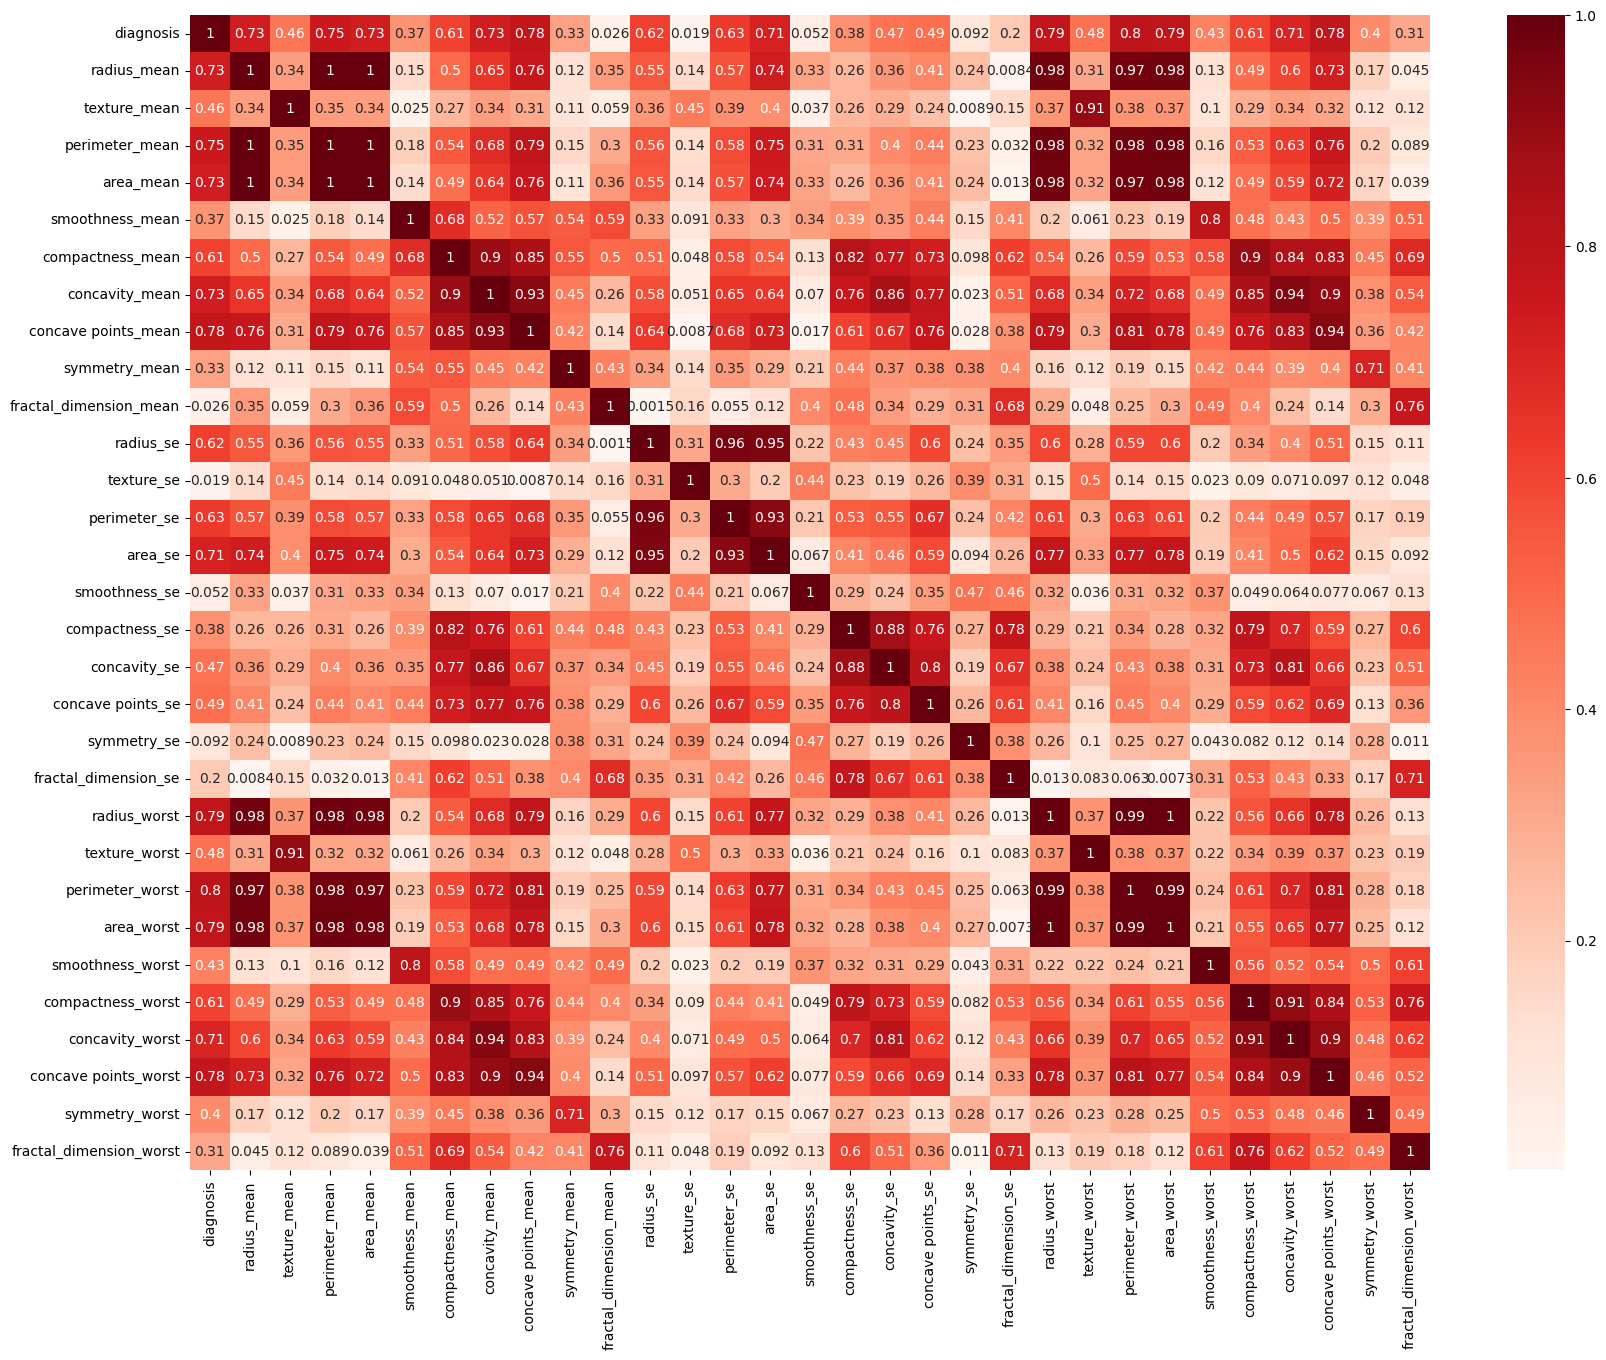

In [5]:
#We'll do a correlation matrix heatmap, to see the relation between variable 
#Use spearman method as we don't know how the data is distributed and what correlation is between features
corr_matrix = data.corr(method='spearman').abs()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

In [6]:
#Let's see how diagnosis behave vs each feature
cols = X.columns
fig = go.Figure()

for i in range(len(cols)):
    fig.add_trace(go.Scatter(x=data[cols[i]], y=y, mode='markers', name='Diagnosis vs. ' + cols[i]))

buttons = []

for i in range(len(cols)):
    buttons.append(dict(method='update', label=cols[i], args=[{'visible': [True if j == i else False for j in range(len(cols))]},
                                                                 {'title': 'Diagnosis vs ' + cols[i]}]))

updatemenu = []
menu = {}
updatemenu.append(menu)

updatemenu[0]['buttons'] = buttons

fig.update_layout(updatemenus=updatemenu)
fig.update_layout(width=1200, height=500)

fig.show()

NameError: name 'go' is not defined

In [ ]:
#Box plots for every feature to see some statistics and outliers
cols = X.columns
fig = go.Figure()

for i in range(len(cols)):
    fig.add_trace(go.Box(y=X[cols[i]], name=cols[i]))

buttons = []

for i in range(len(cols)):
    buttons.append(dict(method='update', label=cols[i], args=[{'visible': [True if j == i else False for j in range(len(cols))]},
                                                                 {'title': cols[i]}]))

updatemenu = []
menu = {}
updatemenu.append(menu)

updatemenu[0]['buttons'] = buttons

fig.update_layout(updatemenus=updatemenu)
fig.update_layout(width=1200, height=500)

fig.show()

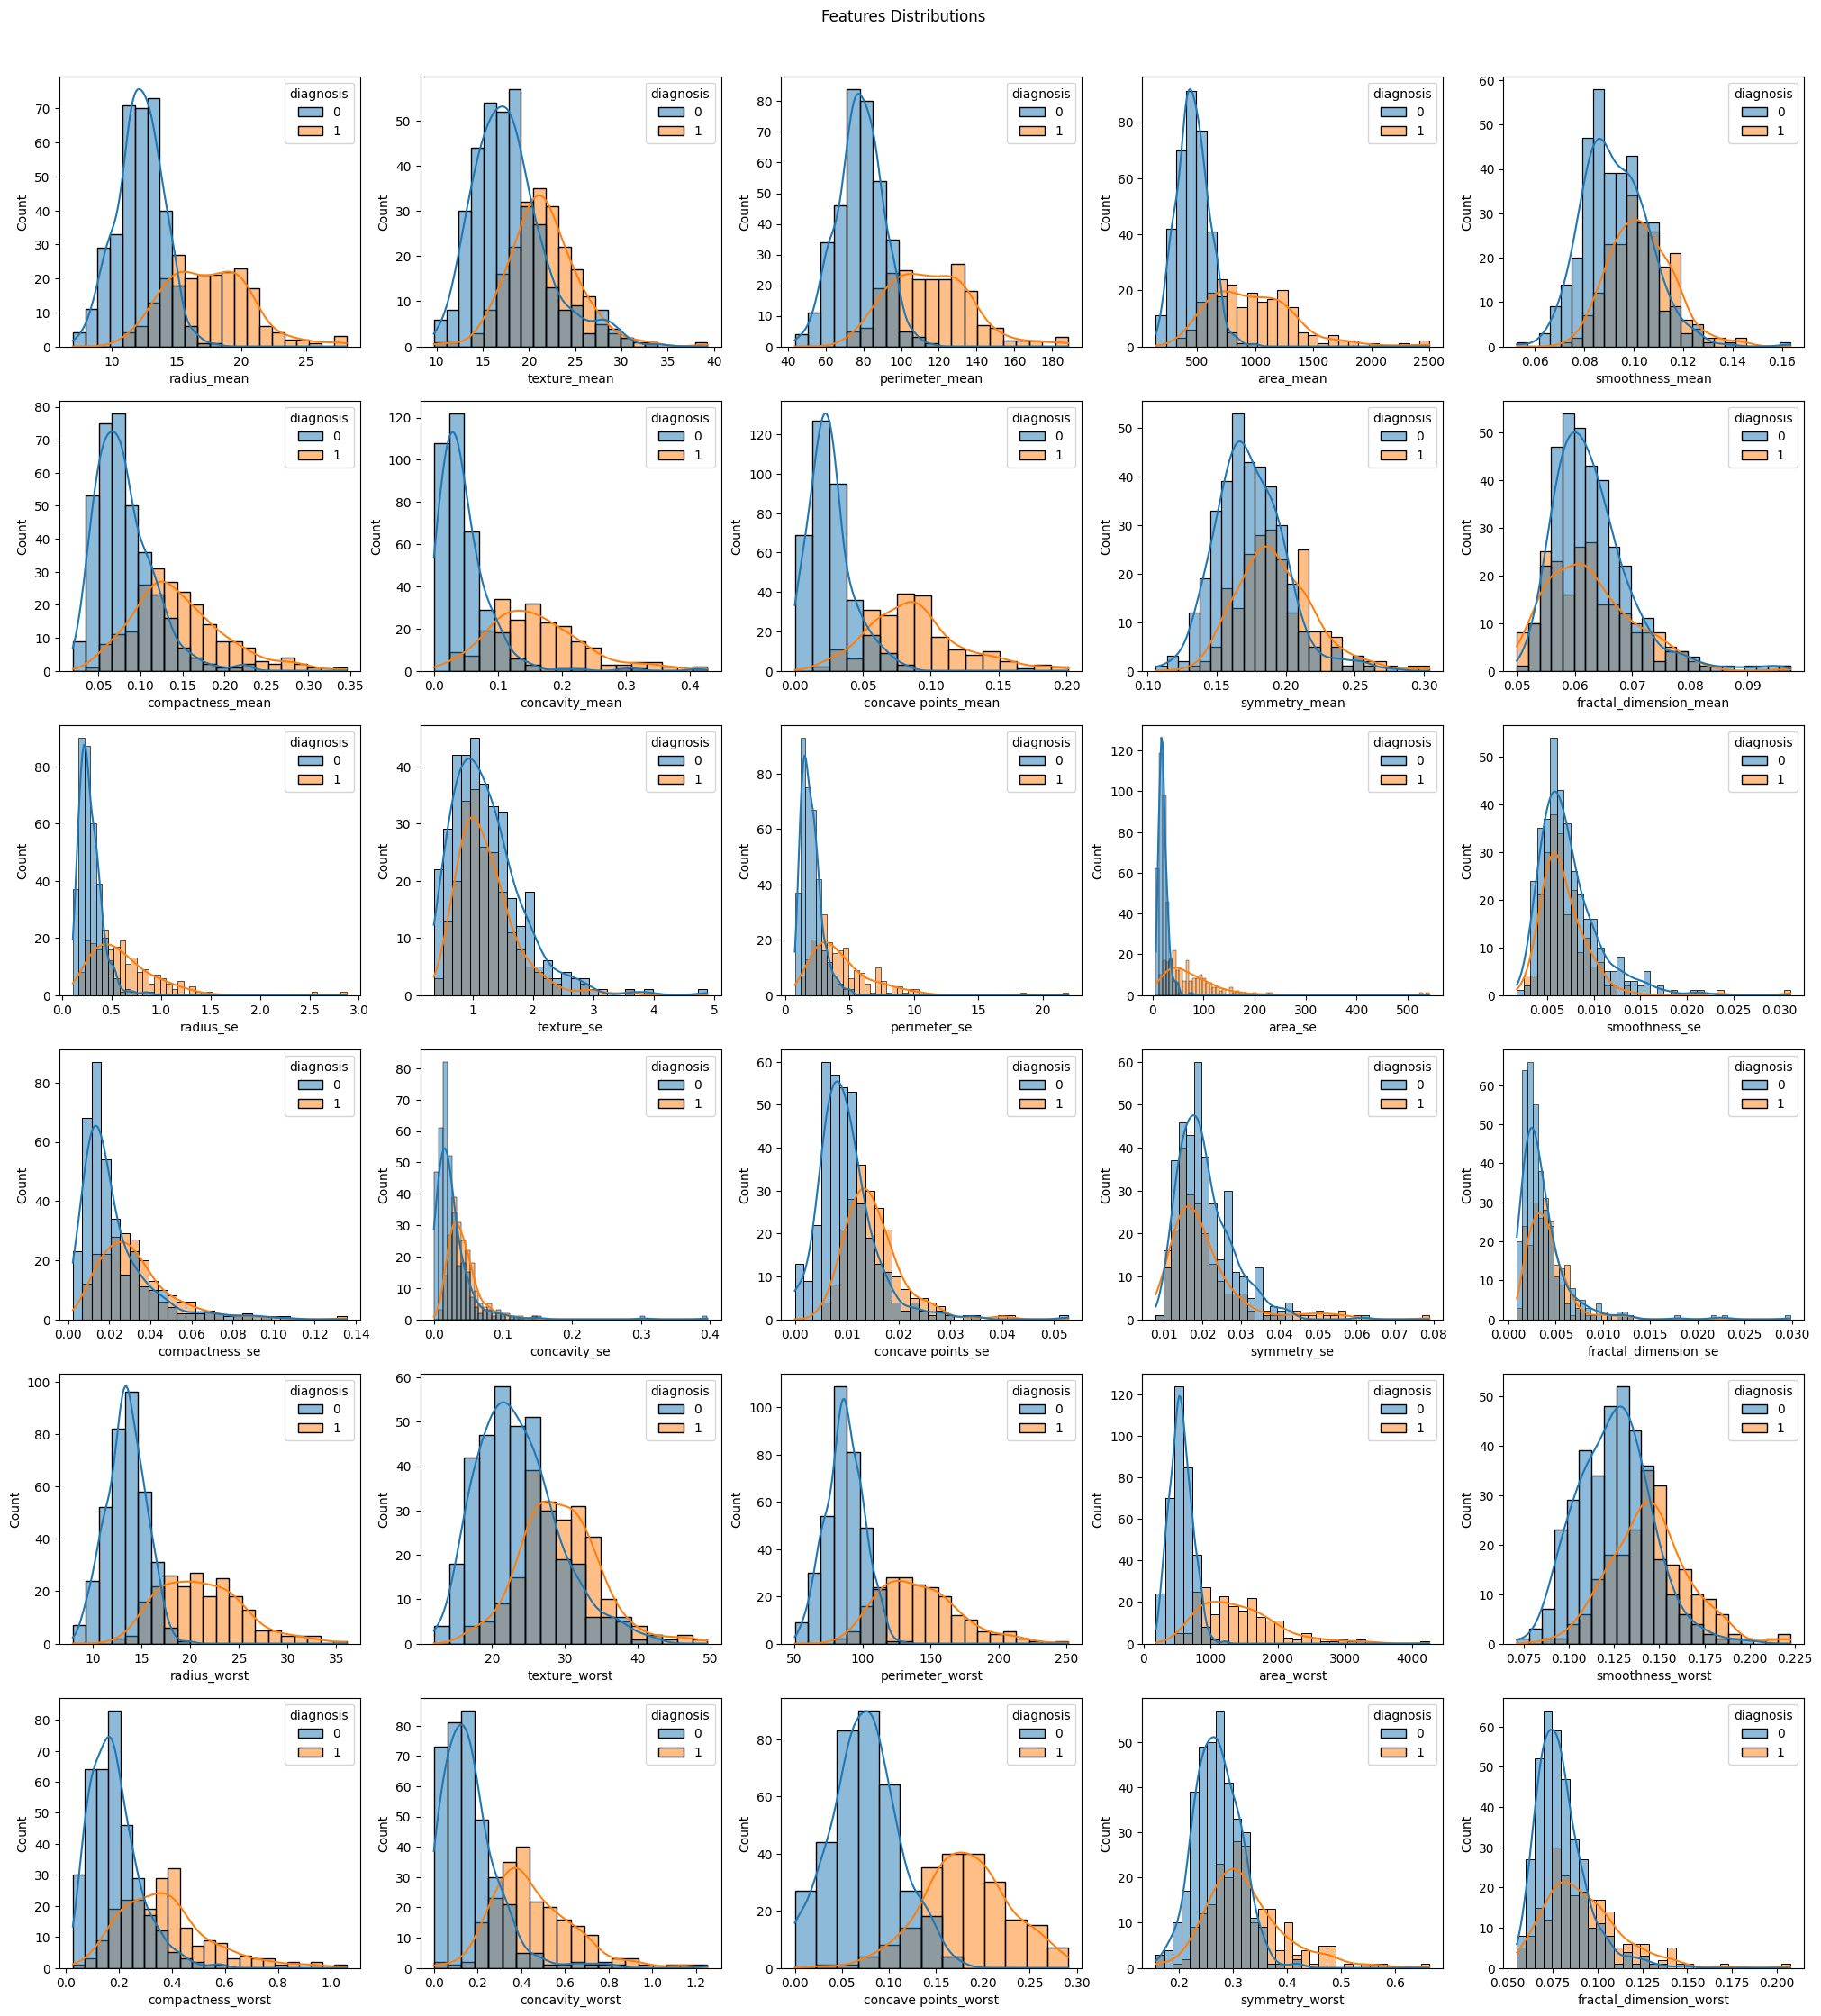

In [ ]:
#Distribution for each feature
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25))

for i in range(len(cols)):
    sns.histplot(data=data, x = X[cols[i]], ax = axes[i // 5][i % 5], kde=True, hue='diagnosis')

fig.suptitle("Features Distributions")

plt.subplots_adjust(top=0.95)

plt.show()

In [ ]:
#Let's normalize the data to have better performance
scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

接下来，将数据集分为训练集和测试集，可以使用train_test_split函数来进行随机划分。

In [ ]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. 模型训练和评估
对于每个模型，首先创建一个实例，然后使用训练集进行训练，最后使用测试集进行预测和评估。

3. 模型训练和评估
对于每个模型，首先创建一个实例，然后使用训练集进行训练，最后使用测试集进行预测和评估。

In [ ]:
# 创建朴素贝叶斯模型实例
nb_model = GaussianNB()

# 模型训练
nb_model.fit(X_train, y_train)

# 模型预测
nb_pred = nb_model.predict(X_test)

# 计算指标
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)


3.2 决策树模型

In [ ]:
# 创建决策树模型实例
dt_model = DecisionTreeClassifier()

# 模型训练
dt_model.fit(X_train, y_train)

# 模型预测
dt_pred = dt_model.predict(X_test)

# 计算指标
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)


3.3 随机森林模型

In [ ]:
# 创建随机森林模型实例
rf_model = RandomForestClassifier()

# 模型训练
rf_model.fit(X_train, y_train)

# 模型预测
rf_pred = rf_model.predict(X_test)

# 计算指标
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)


3.4 多层感知机模型

In [ ]:
# 创建多层感知机模型实例
mlp_model = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, activation='relu',
                          solver='adam', random_state=42)

# 模型训练
mlp_model.fit(X_train, y_train)

# 模型预测
mlp_pred = mlp_model.predict(X_test)

# 计算指标
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)
mlp_confusion_matrix = confusion_matrix(y_test, mlp_pred)


4. 结果比较和分析

为了对四个模型的性能进行比较和分析，你可以绘制混淆矩阵，并计算准确率、精确率和召回率。

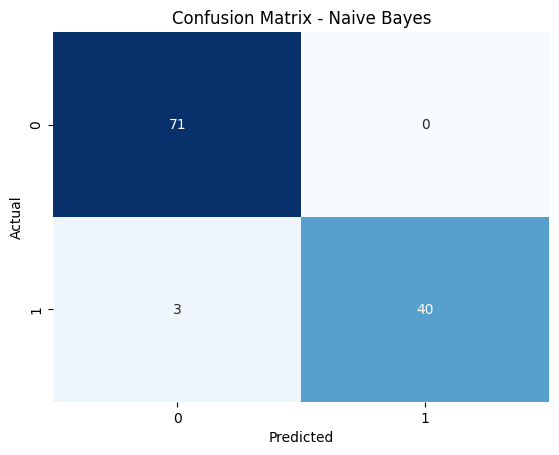

Naive Bayes Accuracy: 0.9736842105263158
Naive Bayes Precision: 1.0
Naive Bayes Recall: 0.9302325581395349



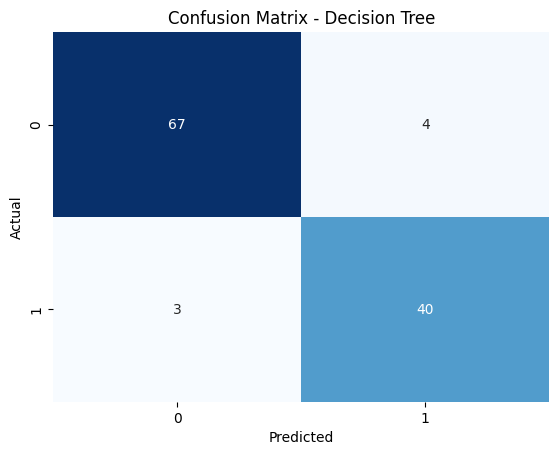

Decision Tree Accuracy: 0.9385964912280702
Decision Tree Precision: 0.9090909090909091
Decision Tree Recall: 0.9302325581395349



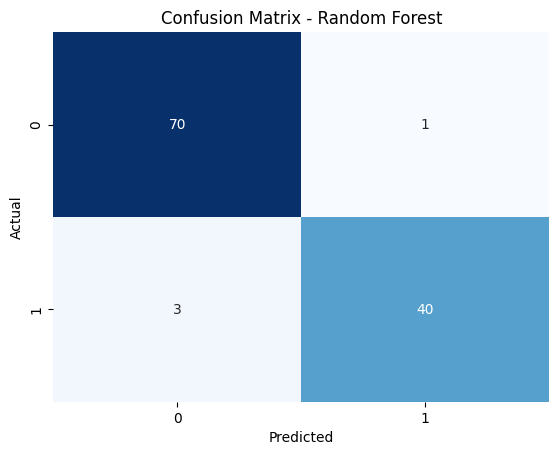

Random Forest Accuracy: 0.9649122807017544
Random Forest Precision: 0.975609756097561
Random Forest Recall: 0.9302325581395349



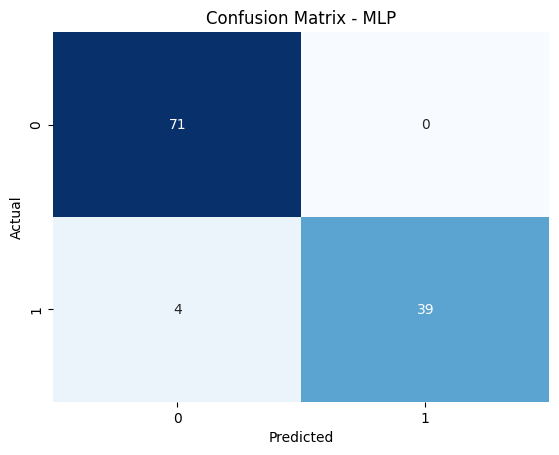

MLP Accuracy: 0.9649122807017544
MLP Precision: 1.0
MLP Recall: 0.9069767441860465



In [ ]:
# 绘制朴素贝叶斯模型的混淆矩阵
plt.figure()
plt.title('Confusion Matrix - Naive Bayes')
sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 打印朴素贝叶斯模型的评估指标
print('Naive Bayes Accuracy:', nb_accuracy)
print('Naive Bayes Precision:', nb_precision)
print('Naive Bayes Recall:', nb_recall)
print()

# 同样，绘制其他模型的混淆矩阵和打印评估指标
# ...
plt.figure()
plt.title('Confusion Matrix - Decision Tree')
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Decision Tree Accuracy:', dt_accuracy)
print('Decision Tree Precision:', dt_precision)
print('Decision Tree Recall:', dt_recall)
print()
# 进行其他模型的比较和分析
# ...
plt.figure()
plt.title('Confusion Matrix - Random Forest')
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Precision:', rf_precision)
print('Random Forest Recall:', rf_recall)
print()

plt.figure()
plt.title('Confusion Matrix - MLP')
sns.heatmap(mlp_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('MLP Accuracy:', mlp_accuracy)
print('MLP Precision:', mlp_precision)
print('MLP Recall:', mlp_recall)
print()


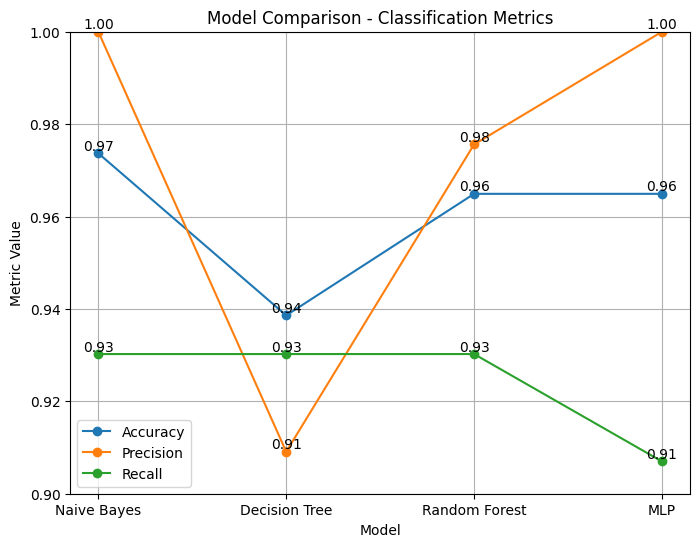

In [ ]:
# 创建存储指标值的列表
accuracies = [nb_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy]
precisions = [nb_precision, dt_precision, rf_precision, mlp_precision]
recalls = [nb_recall, dt_recall, rf_recall, mlp_recall]

# 创建模型名称列表
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP']

# 绘制折线图和数据点
plt.figure(figsize=(8, 6))
plt.plot(model_names, accuracies, marker='o', label='Accuracy')
plt.plot(model_names, precisions, marker='o', label='Precision')
plt.plot(model_names, recalls, marker='o', label='Recall')
plt.title('Model Comparison - Classification Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.ylim(0.9, 1)  # 设置纵轴范围

# 在数据点上添加标签
for i in range(len(model_names)):
    plt.text(model_names[i], accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom')
    plt.text(model_names[i], precisions[i], f'{precisions[i]:.2f}', ha='center', va='bottom')
    plt.text(model_names[i], recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()


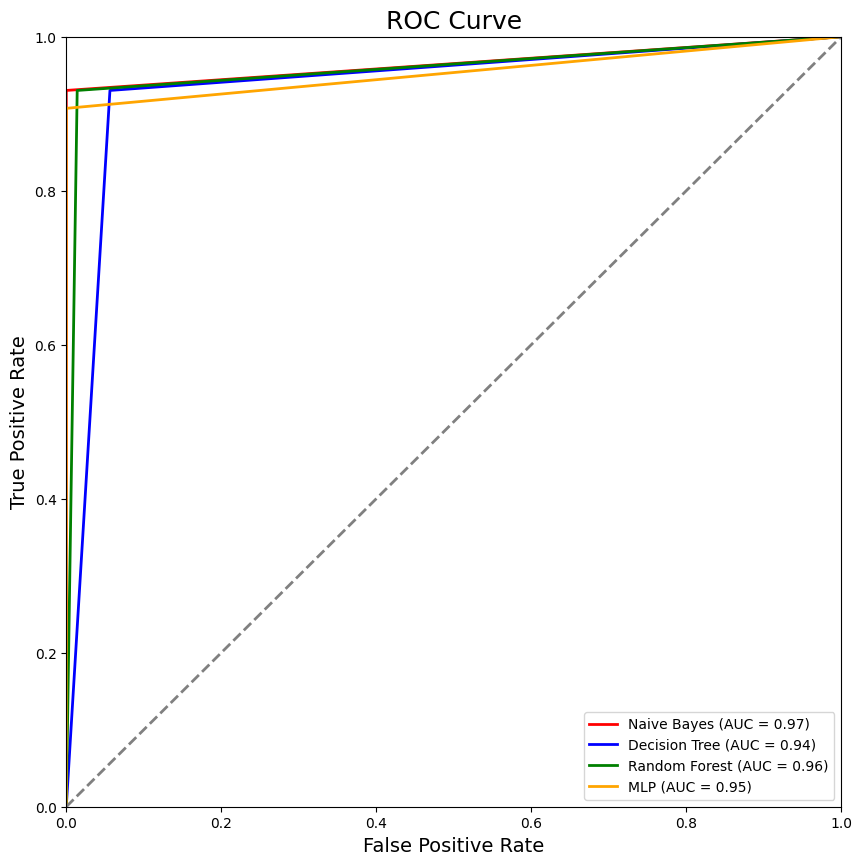

In [ ]:
# 计算每个模型的FPR和TPR
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_pred)
auc_nb = metrics.auc(fpr_nb, tpr_nb)

fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_pred)
auc_dt = metrics.auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_pred)
auc_rf = metrics.auc(fpr_rf, tpr_rf)

fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, mlp_pred)
auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)

# 绘制ROC曲线
plt.figure(figsize=(10, 10))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (AUC = %0.2f)' % auc_nb)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_mlp, tpr_mlp, color='orange', lw=2, label='MLP (AUC = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()
